In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src import generator as gen
from src.estimators import SNNEstimator, RidgeEstimator
from src.general_snn import general_snn
from src import anchor_matrix as am

In [2]:
def print_analytics(RMSEs, MAEs, rating_matrix, Y_restored):
  print(f"RMSE: {np.mean(RMSEs):.4f}±{np.sqrt(np.var(RMSEs)):.3f}")
  print(f"MAE: {np.mean(MAEs):.4f}±{np.sqrt(np.var(MAEs)):.3f}")
  # distribution of true vs restored samples:
  plt.hist(rating_matrix.flatten(), bins=100, alpha=0.3, label="true ratings")
  plt.hist(Y_restored.flatten(), bins=100, color='C0', alpha=0.7, label="restored ratings")
  plt.xlabel('ratings')
  plt.ylabel('frequency')
  plt.grid(alpha=0.5)
  plt.legend()
  plt.legend(loc="upper right");

In [3]:
inv_scale=1

rating_matrix, P = gen.getRatingAndPropensityMatrix(inv_scale=inv_scale)

0/80
1/80
2/80
3/80
4/80
5/80
6/80
7/80
8/80
9/80
10/80
11/80
12/80
13/80
14/80
15/80
16/80
17/80
18/80
19/80
20/80
21/80
22/80
23/80
24/80
25/80
26/80
27/80
28/80
29/80
30/80
31/80
32/80
33/80
34/80
35/80
36/80
37/80
38/80
39/80
40/80
41/80
42/80
43/80
44/80
45/80
46/80
47/80
48/80
49/80
50/80
51/80
52/80
53/80
54/80
55/80
56/80
57/80
58/80
59/80
60/80
61/80
62/80
63/80
64/80
65/80
66/80
67/80
68/80
69/80
70/80
71/80
72/80
73/80
74/80
75/80
76/80
77/80
78/80
79/80
RMSE: 0.4327±0.000
MAE: 0.2696±0.000


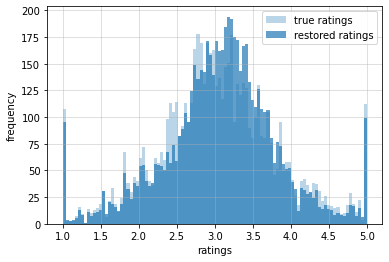

In [5]:
RMSEs = []
MAEs = []
for _ in range(1):
    D = np.random.binomial(1, P)
    Y = rating_matrix.copy()
    Y[D == 0] = np.nan
    Y_restored = general_snn(
      D, Y,
      biclique_search=am.biclique_random,
      estimator=SNNEstimator(),
      #estimator=RidgeEstimator(),
      num_estimates=3,
      min_val=1, max_val=5,
      print_progress=True
    )
    Error = (rating_matrix - Y_restored).flatten()
    RMSEs.append(np.sqrt(np.mean(Error ** 2)))
    MAEs.append(np.mean(np.abs(Error)))

print_analytics(RMSEs, MAEs, rating_matrix, Y_restored)